In [1]:
#fix for scipy version 1.0.0, if using another version or new scikit-learn, could be removed
from scipy.sparse.csgraph import laplacian as csgraph_laplacian

## Here we import the important modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## We create a dataset of 2 circles, inner circle and outer circle

In [3]:
from sklearn.datasets import make_moons

n_samples = 1500
noise=.05
X, y = make_moons(n_samples=n_samples, shuffle=False, noise = noise)
outer, inner = 0, 1
labels = -np.ones(n_samples)

rand_idx = np.random.choice(n_samples, int(n_samples * 0.01), replace = False)

pos = rand_idx[rand_idx < 750]
neg = rand_idx[rand_idx > 750]

labels[pos] = outer
labels[neg] = inner

Text(0.5,1,'Raw data (2 classes=outer and inner)')

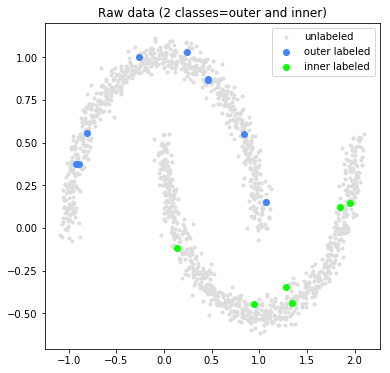

In [4]:
plt.figure(figsize=(6, 6))
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='#dddddd',
            marker='.', label='unlabeled')
plt.scatter(X[labels == outer, 0], X[labels == outer, 1], color='#4286f4',
            marker='o', lw=0, label="outer labeled", s=50)
plt.scatter(X[labels == inner, 0], X[labels == inner, 1], color='#0cff00',
            marker='o', lw=0, label='inner labeled', s=50)
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Raw data (2 classes=outer and inner)")

## Create a machine learning model and train it on the original dataset

In [5]:
# from sklearn import svm
# clf = svm.SVC(kernel='rbf', probability=True)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5)

original_data = X[labels != -1]
original_labels = labels[labels != -1]

# TRAIN CLASSIFIER ON ORIGINAL DATA
clf.fit(original_data, original_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Text(0.5,1,'Raw data (2 classes=outer and inner)')

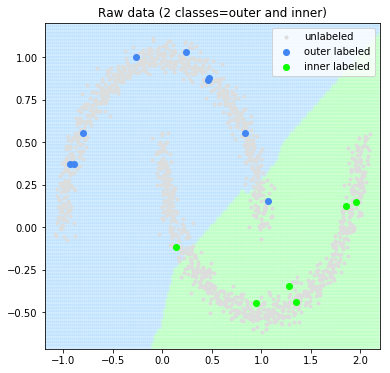

In [6]:
plt.figure(figsize=(6, 6))

from matplotlib.colors import ListedColormap
h = .02
cmap_light = ListedColormap(['#bfe3ff', '#baffc1'])
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha = 0.3, edgecolors = 'face')

plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='#dddddd',
            marker='.', label='unlabeled')
plt.scatter(X[labels == outer, 0], X[labels == outer, 1], color='#4286f4',
            marker='o', lw=0, label="outer labeled", s=50)
plt.scatter(X[labels == inner, 0], X[labels == inner, 1], color='#0cff00',
            marker='o', lw=0, label='inner labeled', s=50)

plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Raw data (2 classes=outer and inner)")

##  <span style="color:red"> We create our semi-supervised model for self-training here <span>
<hr>
###  <span style="color:red"> ------------------------------------------------------------------------------- <span>

In [7]:
n_iter = 700

for i in range(0,n_iter):
    
    #  GET THE UNLABELED DATA
    unlabeled_data = X[labels == -1]
    probabilities = clf.predict_proba(unlabeled_data)

    # FIND THE MOST POSITIVE AND MOST NEGATIVE EXAMPLE
    maximum_index_positive = np.argmax(probabilities[:,0])
    new_point_positive = np.expand_dims(unlabeled_data[maximum_index_positive,:], axis = 0)

    maximum_index_negative = np.argmax(probabilities[:,1])
    new_point_negative = np.expand_dims(unlabeled_data[maximum_index_negative,:], axis = 0)

    # APPEND MOST POSITIVE AND MOST NEGATIVE EXAMPLE TO THE TRAINING SET
    original_data = np.append(original_data, new_point_positive, axis = 0)
    original_data = np.append(original_data, new_point_negative, axis = 0)

    original_labels = np.append(original_labels,[0])
    original_labels = np.append(original_labels,[1])

    original_index_pos = X.tolist().index(new_point_positive.tolist()[0])
    original_index_neg = X.tolist().index(new_point_negative.tolist()[0])
    labels[original_index_pos] = 0
    labels[original_index_neg] = 1

    # RETRAIN THE CLASSIFIER WITH THE NEW DATA
    clf.fit(original_data, original_labels)



###  <span style="color:red"> ------------------------------------------------------------------------------- <span>

Text(0.5,1,'Raw data (2 classes=outer and inner)')

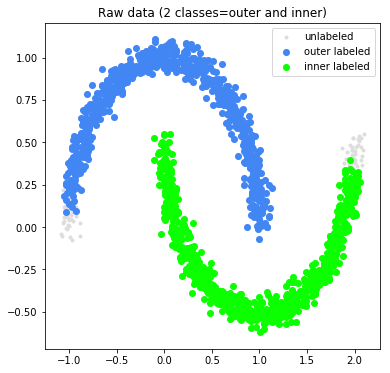

In [8]:
plt.figure(figsize=(6, 6))
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='#dddddd',
            marker='.', label='unlabeled')
plt.scatter(X[labels == outer, 0], X[labels == outer, 1], color='#4286f4',
            marker='o', lw=0, label="outer labeled", s=50)
plt.scatter(X[labels == inner, 0], X[labels == inner, 1], color='#0cff00',
            marker='o', lw=0, label='inner labeled', s=50)
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Raw data (2 classes=outer and inner)")

## Train the original classifier clf on the new dataset

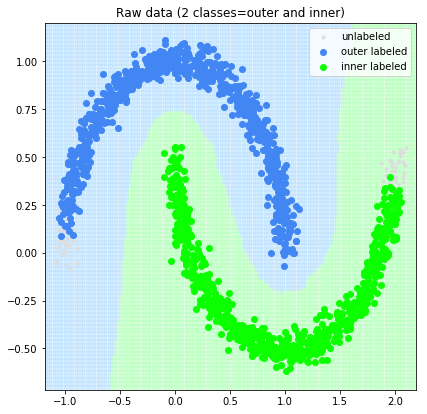

In [9]:
plt.figure(figsize=(6, 6))

from matplotlib.colors import ListedColormap
h = .02
cmap_light = ListedColormap(['#bfe3ff', '#baffc1'])
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha = 0.3, edgecolors = 'face')

plt.scatter(X[labels == -1, 0], X[labels == -1, 1], color='#dddddd',
            marker='.', label='unlabeled')
plt.scatter(X[labels == outer, 0], X[labels == outer, 1], color='#4286f4',
            marker='o', lw=0, label="outer labeled", s=50)
plt.scatter(X[labels == inner, 0], X[labels == inner, 1], color='#0cff00',
            marker='o', lw=0, label='inner labeled', s=50)
plt.legend(scatterpoints=1, shadow=False, loc='upper right')
plt.title("Raw data (2 classes=outer and inner)")


plt.subplots_adjust(left=0.07, bottom=0.07, right=0.93, top=0.92)
plt.show()